### Comparing Models

Now that you have seen a variety of models for regression and classification problems, it is good to step back and weigh the pros and cons of these options.  In the case of classification models, there are at least three things to consider:

1. Is the model good at handling imbalanced classes?
2. Does the model train quickly?
3. Does the model yield interpretable results?

Depending on your dataset and goals, the importance of these considerations will vary from project to project.  Your goal is to review our models to this point and discuss the pros and cons of each.  Two example datasets are offered as a way to offer two very different tasks where interpretability of the model may be of differing importance.

### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [41]:
# Load the dataset
data = pd.read_csv('bank+marketing/bank/bank.csv',sep = ';')

In [42]:
data.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


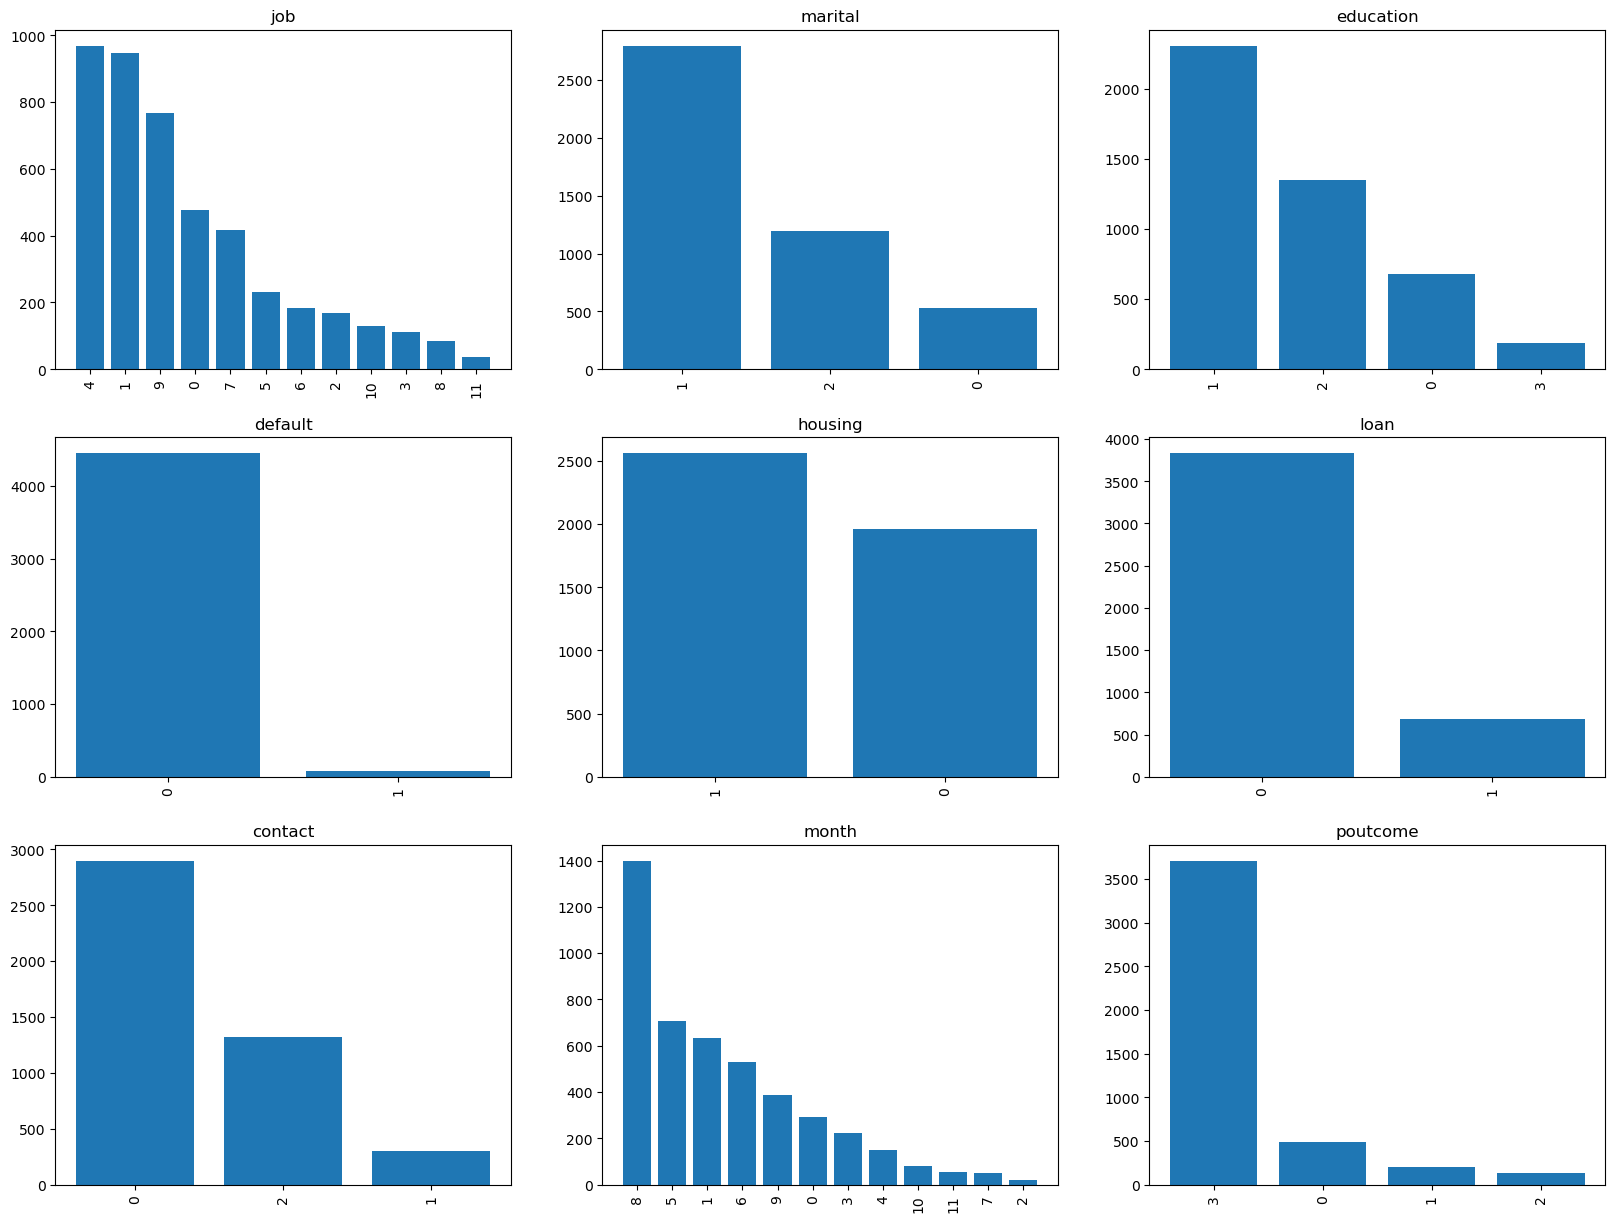

In [67]:
cat_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month','poutcome']

fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for cat_column in cat_columns:
    value_counts = df[cat_column].value_counts()
    
    trace_x = counter // 3
    trace_y = counter % 3
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(cat_column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.show()

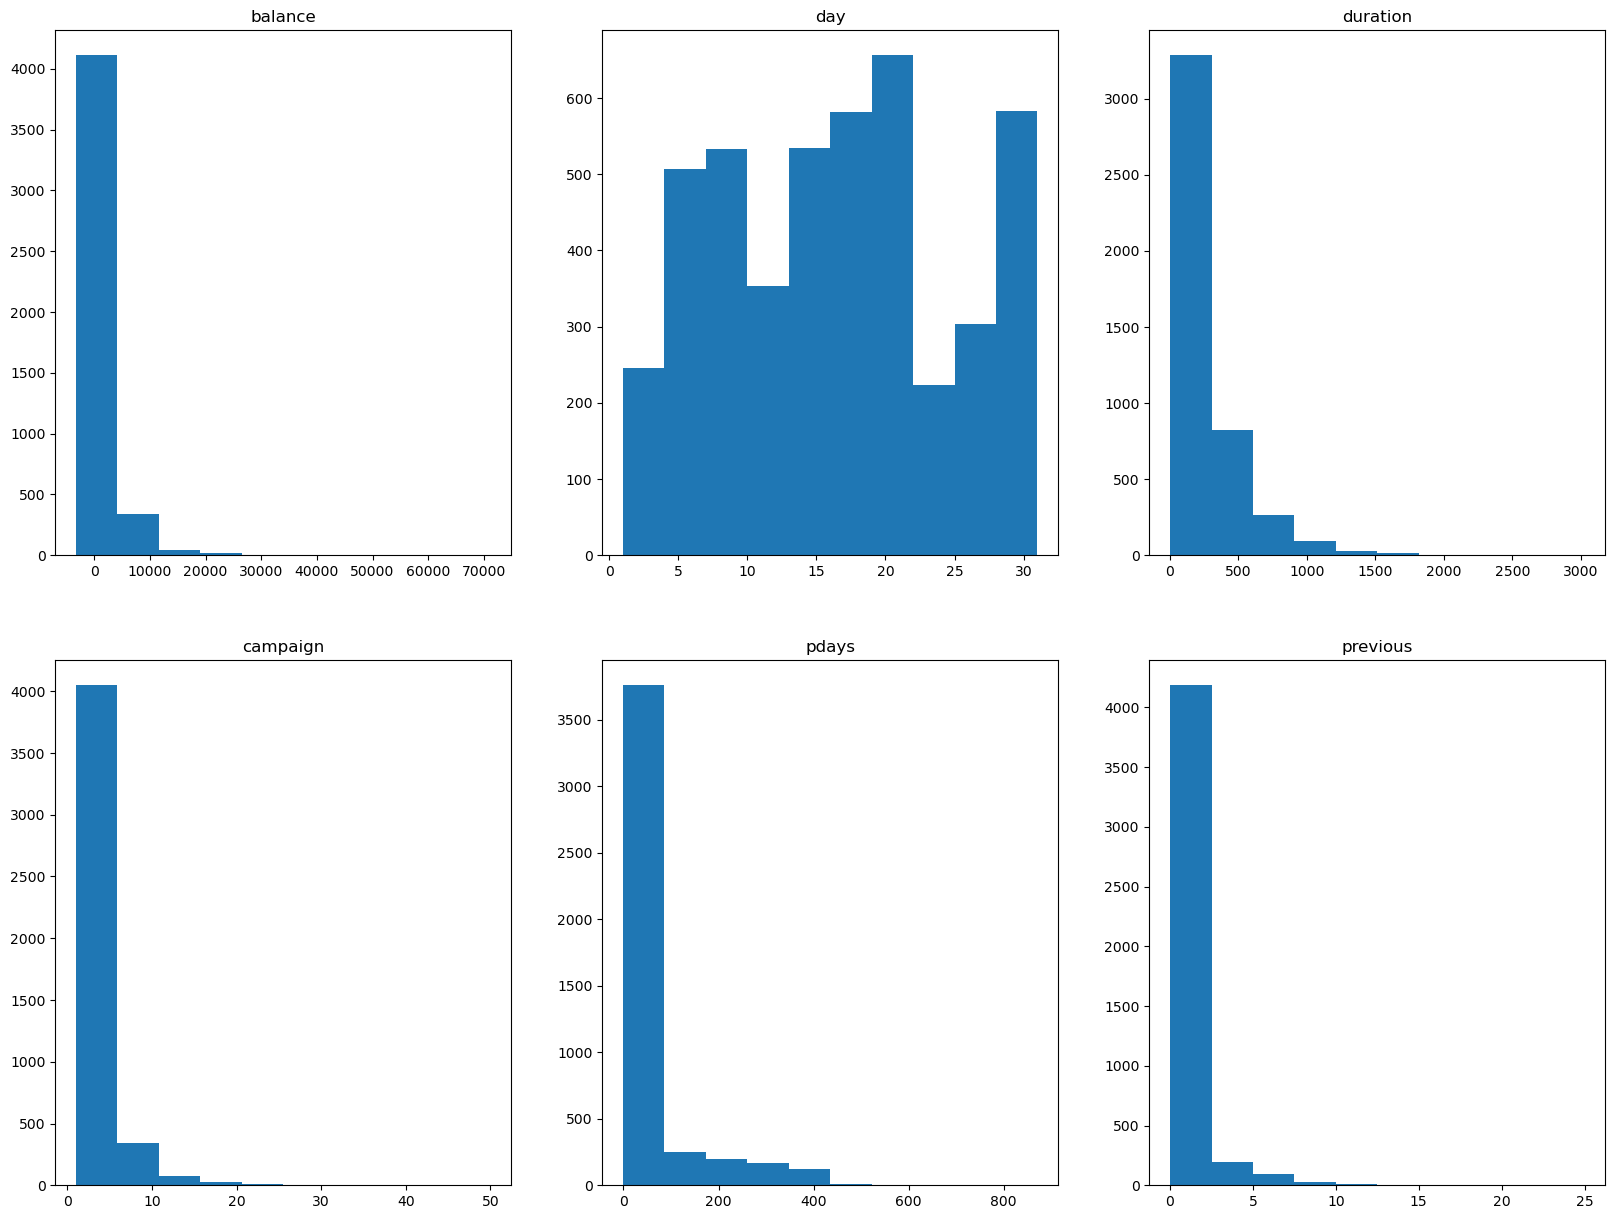

In [68]:
num_columns = ['balance', 'day','duration', 'campaign', 'pdays', 'previous']

fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for num_column in num_columns:
    
    trace_x = counter // 3
    trace_y = counter % 3
    
    axs[trace_x, trace_y].hist(df[num_column])
    
    axs[trace_x, trace_y].set_title(num_column)
    
    counter += 1

plt.show()

In [44]:

#In order to pass the data into k-nearest neighbors we need to encode the categorical values to integers
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

#encoding/transforming
data['job'] = le.fit_transform(df['job'].astype('str'))
data['marital'] = le.fit_transform(df['marital'].astype('str'))
data['education'] = le.fit_transform(df['education'].astype('str'))
data['default'] = le.fit_transform(df['default'].astype('str'))
data['housing'] = le.fit_transform(df['housing'].astype('str'))
data['loan'] = le.fit_transform(df['loan'].astype('str'))
data['contact'] = le.fit_transform(df['contact'].astype('str'))
data['month'] = le.fit_transform(df['month'].astype('str'))
data['poutcome'] = le.fit_transform(df['poutcome'].astype('str'))
data['y'] = le.fit_transform(df['y'].astype('str'))


In [45]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,2,1,0,0,1787,0,0,0,19,2,79,1,-1,0,3,0
1,33,9,1,1,0,4789,1,1,0,11,10,220,1,339,4,0,0
2,35,6,2,2,0,1350,1,0,0,16,0,185,1,330,1,0,0
3,30,6,1,2,0,1476,1,1,2,3,8,199,4,-1,0,3,0
4,59,1,1,1,0,0,1,0,2,5,10,226,1,-1,0,3,0


In [58]:
# Splitting the data
X = data.drop('y', axis=1)
y = data['y'].astype(int)

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(model):
    start_time = time.time()
    model.fit(X_train, y_train)
    fit_time = time.time() - start_time
    
    train_score = model.score(X_train, y_train)
    test_score = model.score(X_test, y_test)
    
    return train_score, test_score, fit_time

# Models 
log_reg = make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000))
dec_tree = make_pipeline(StandardScaler(), DecisionTreeClassifier())
dec_tree_2 = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth = 2))
dec_tree_4 = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth = 4))
dec_tree_6 = make_pipeline(StandardScaler(), DecisionTreeClassifier(max_depth = 6))
knn_2 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 2)) 
knn_5 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 5)) 
knn_10 = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors = 10)) 
svm_linear = make_pipeline(StandardScaler(), SVC(kernel = 'linear'))
svm_poly = make_pipeline(StandardScaler(), SVC(kernel = 'poly'))
svm_rbf = make_pipeline(StandardScaler(), SVC(kernel = 'rbf'))

# Evaluating models
lr_train_score, lr_test_score, lr_fit_time = evaluate_model(log_reg)
                        
dt_train_score2, dt_test_score2, dt_fit_time2 = evaluate_model(dec_tree_2)
dt_train_score4, dt_test_score4, dt_fit_time4 = evaluate_model(dec_tree_4)
dt_train_score6, dt_test_score6, dt_fit_time6 = evaluate_model(dec_tree_6)
                        
knn_train_score2, knn_test_score2, knn_fit_time2 = evaluate_model(knn_2)
knn_train_score5, knn_test_score5, knn_fit_time5 = evaluate_model(knn_5)
knn_train_score10, knn_test_score10, knn_fit_time10 = evaluate_model(knn_10)
                        
svm_train_score_linear, svm_test_score_linear, svm_fit_time_linear = evaluate_model(svm_linear)
svm_train_score_poly, svm_test_score_poly, svm_fit_time_poly = evaluate_model(svm_poly)
svm_train_score_rbf, svm_test_score_rbf, svm_fit_time_rbf = evaluate_model(svm_rbf)

# Creating a results DataFrame
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree MaxDepth = 2', 'Decision Tree MaxDepth = 4','Decision Tree MaxDepth = 6', 
              'KNN_2','KNN_5', 'KNN_10', 'SVM_linear', 'SVM_poly', 'SVM_rbf'],
    'Train Score': [lr_train_score, dt_train_score2, dt_train_score4, dt_train_score6,  knn_train_score2, knn_train_score5, knn_train_score10,
                    svm_train_score_linear, svm_train_score_poly, svm_train_score_rbf],
    'Test Score': [lr_test_score, dt_test_score2, dt_test_score4, dt_test_score6,  knn_test_score2, knn_test_score5, knn_test_score10,
                   svm_test_score_linear, svm_test_score_poly, svm_test_score_rbf],
    'Fit Time (s)': [lr_fit_time, dt_fit_time2, dt_fit_time4, dt_fit_time6,  knn_fit_time2, knn_fit_time5, knn_fit_time10, 
                     svm_fit_time_linear, svm_fit_time_poly, svm_fit_time_rbf]
})

print(results)

                        Model  Train Score  Test Score  Fit Time (s)
0         Logistic Regression     0.889934    0.898343      0.020319
1  Decision Tree MaxDepth = 2     0.891593    0.885083      0.020146
2  Decision Tree MaxDepth = 4     0.912058    0.899448      0.020093
3  Decision Tree MaxDepth = 6     0.928374    0.899448      0.017952
4                       KNN_2     0.923396    0.898343      0.005323
5                       KNN_5     0.913164    0.896133      0.010033
6                      KNN_10     0.896018    0.890608      0.006896
7                  SVM_linear     0.883020    0.891713      0.313631
8                    SVM_poly     0.914823    0.888398      0.209402
9                     SVM_rbf     0.913440    0.895028      0.215240


In [59]:
type(results)

pandas.core.frame.DataFrame

In [60]:
results.head()

,Model,Train Score,Test Score,Fit Time (s)
0,Logistic Regression,0.889934,0.898343,0.020319
1,Decision Tree MaxDepth = 2,0.891593,0.885083,0.020146
2,Decision Tree MaxDepth = 4,0.912058,0.899448,0.020093
3,Decision Tree MaxDepth = 6,0.928374,0.899448,0.017952
4,KNN_2,0.923396,0.898343,0.005323


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree MaxDepth = 2'),
  Text(2, 0, 'Decision Tree MaxDepth = 4'),
  Text(3, 0, 'Decision Tree MaxDepth = 6'),
  Text(4, 0, 'KNN_2'),
  Text(5, 0, 'KNN_5'),
  Text(6, 0, 'KNN_10'),
  Text(7, 0, 'SVM_linear'),
  Text(8, 0, 'SVM_poly'),
  Text(9, 0, 'SVM_rbf')])

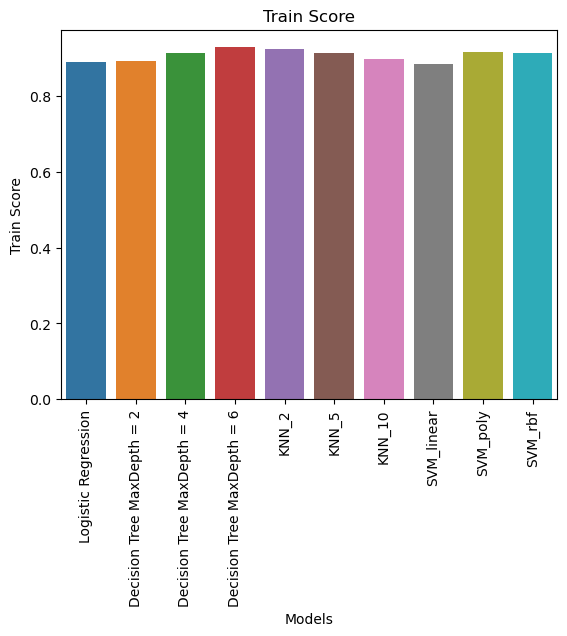

In [63]:
sns.barplot(x = 'Model',
            y = 'Train Score',
            data = results)
plt.title('Train Score')
plt.xlabel('Models')
plt.ylabel('Train Score')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree MaxDepth = 2'),
  Text(2, 0, 'Decision Tree MaxDepth = 4'),
  Text(3, 0, 'Decision Tree MaxDepth = 6'),
  Text(4, 0, 'KNN_2'),
  Text(5, 0, 'KNN_5'),
  Text(6, 0, 'KNN_10'),
  Text(7, 0, 'SVM_linear'),
  Text(8, 0, 'SVM_poly'),
  Text(9, 0, 'SVM_rbf')])

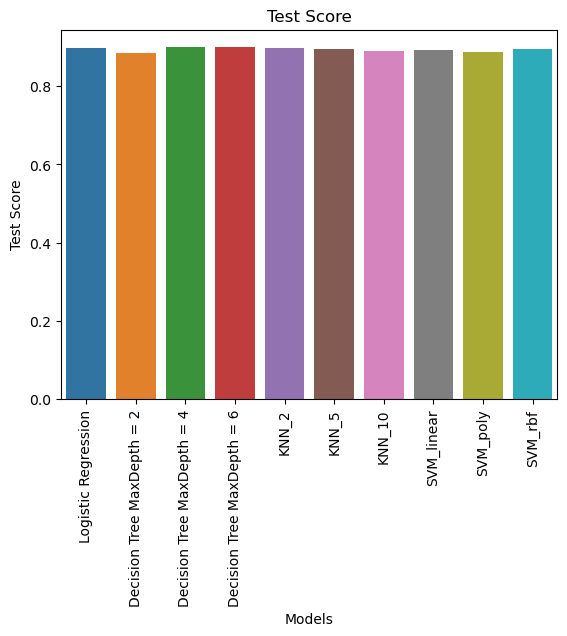

In [65]:
sns.barplot(x = 'Model',
            y = 'Test Score',
            data = results)
plt.title('Test Score')
plt.xlabel('Models')
plt.ylabel('Test Score')
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Logistic Regression'),
  Text(1, 0, 'Decision Tree MaxDepth = 2'),
  Text(2, 0, 'Decision Tree MaxDepth = 4'),
  Text(3, 0, 'Decision Tree MaxDepth = 6'),
  Text(4, 0, 'KNN_2'),
  Text(5, 0, 'KNN_5'),
  Text(6, 0, 'KNN_10'),
  Text(7, 0, 'SVM_linear'),
  Text(8, 0, 'SVM_poly'),
  Text(9, 0, 'SVM_rbf')])

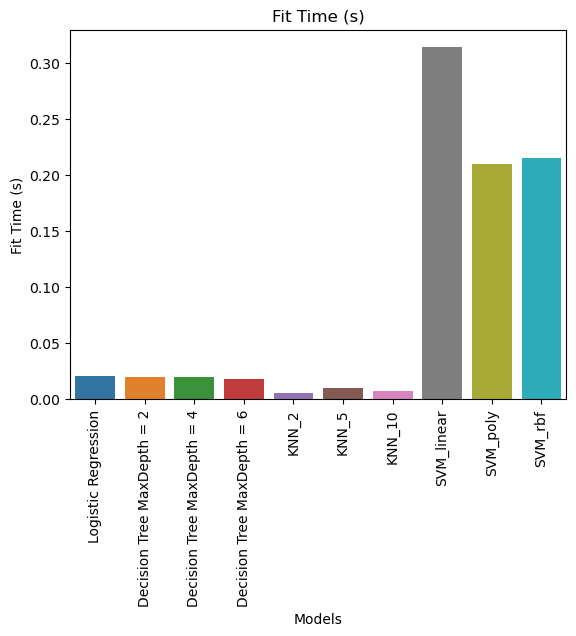

In [66]:
sns.barplot(x = 'Model',
            y = 'Fit Time (s)',
            data = results)
plt.title('Fit Time (s)')
plt.xlabel('Models')
plt.ylabel('Fit Time (s)')
plt.xticks(rotation=90)